# Internal Displacement Monitoring Centre

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("IDMC.csv").convert_dtypes()

### Rows and columns 

In [14]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 11


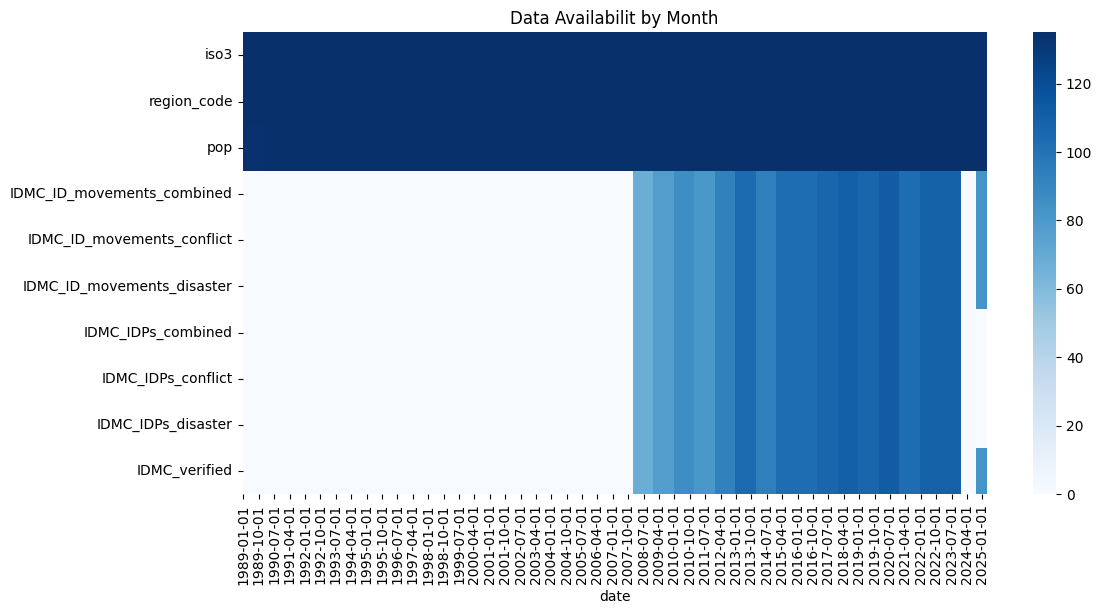

In [5]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

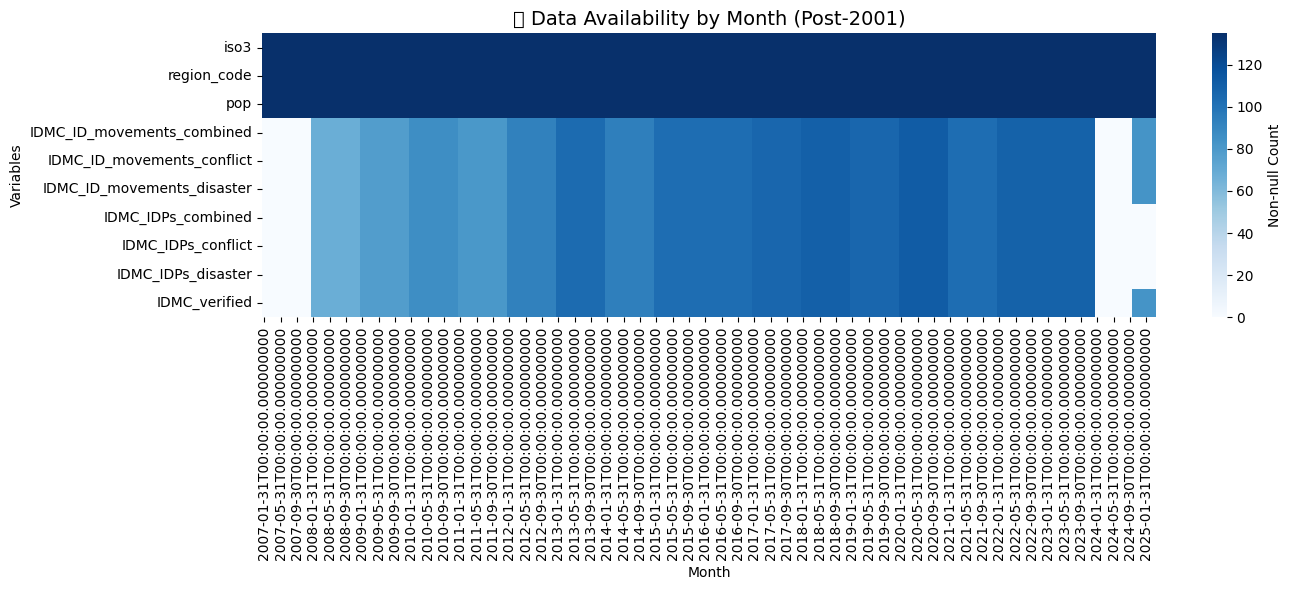

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'yearmon' to datetime format
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce')

# Step 2: Drop rows before 2001
df = df[df['date'] >= pd.to_datetime('2007-01-01')]

# Step 3: Set 'date' as index
df = df.set_index('date').sort_index()

# Step 4: Drop the original 'yearmon' column (optional)
df = df.drop(columns=['yearmon'])

# Step 5: Group by month and count non-null values
missing_by_month = df.groupby(pd.Grouper(freq='M')).count()

# Step 6: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues', cbar_kws={'label': 'Non-null Count'})
plt.title('📅 Data Availability by Month (Post-2001)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### Sample data and features

In [16]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,COM,TGO,ECU,ARM,ZWE
region_code,SSA,SSA,LAC,ECA,SSA
pop,850387.0,9304337.0,17980083.0,2990900.0,16340822.0
IDMC_ID_movements_combined,0.0,<NA>,<NA>,<NA>,0.0
IDMC_ID_movements_conflict,0.0,<NA>,<NA>,<NA>,0.0
IDMC_ID_movements_disaster,0.0,<NA>,<NA>,<NA>,0.0
IDMC_IDPs_combined,<NA>,<NA>,<NA>,<NA>,<NA>
IDMC_IDPs_conflict,<NA>,<NA>,<NA>,<NA>,<NA>
IDMC_IDPs_disaster,<NA>,<NA>,<NA>,<NA>,<NA>
IDMC_verified,False,<NA>,<NA>,<NA>,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29565 entries, 2007-01-01 to 2025-03-01
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso3                        29565 non-null  string 
 1   region_code                 29565 non-null  string 
 2   pop                         29565 non-null  Float64
 3   IDMC_ID_movements_combined  19302 non-null  Float64
 4   IDMC_ID_movements_conflict  19302 non-null  Float64
 5   IDMC_ID_movements_disaster  19302 non-null  Float64
 6   IDMC_IDPs_combined          18804 non-null  Int64  
 7   IDMC_IDPs_conflict          18804 non-null  Int64  
 8   IDMC_IDPs_disaster          18804 non-null  Int64  
 9   IDMC_verified               19302 non-null  boolean
dtypes: Float64(4), Int64(3), boolean(1), string(2)
memory usage: 2.5 MB


### Descriptive statistics of categorical columns

In [18]:
df.describe(include='string').T

,count,unique,top,freq
iso3,29565,135,AFG,219
region_code,29565,6,SSA,10293


### Descriptive statistics of numerical columns

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,29565.0,46389717.064942,166719691.653316,9816.0,2401441.0,10093121.0,30058206.0,1438069596.0
IDMC_ID_movements_combined,19302.0,335880.816278,1198715.196962,0.0,800.0,12159.0,135038.0,18659649.0
IDMC_ID_movements_conflict,19302.0,99856.060235,565844.346614,0.0,0.0,0.0,2788.0,16870323.0
IDMC_ID_movements_disaster,19302.0,236024.756042,1049289.620523,0.0,314.0,6357.0,51039.0,18659649.0
IDMC_IDPs_combined,18804.0,407514.314614,1122585.421589,0.0,0.0,4000.0,217356.0,9052822.0
IDMC_IDPs_conflict,18804.0,386731.39247,1088657.189267,0.0,0.0,115.0,175000.0,9052822.0
IDMC_IDPs_disaster,18804.0,20782.922144,122372.773997,0.0,0.0,0.0,0.0,2098730.0


### Deatils of missing values in the features

In [20]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
IDMC_IDPs_disaster,10761,36.40
IDMC_IDPs_conflict,10761,36.40
IDMC_IDPs_combined,10761,36.40
IDMC_ID_movements_disaster,10263,34.71
IDMC_ID_movements_conflict,10263,34.71
IDMC_ID_movements_combined,10263,34.71
IDMC_verified,10263,34.71
iso3,0,0.00
region_code,0,0.00
pop,0,0.00


In [21]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [22]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

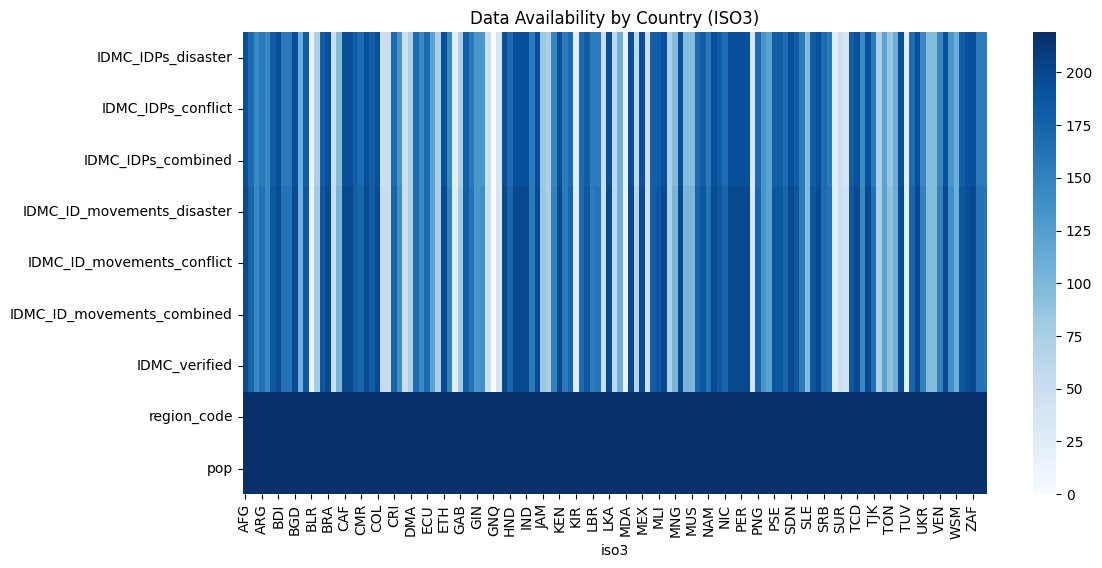

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

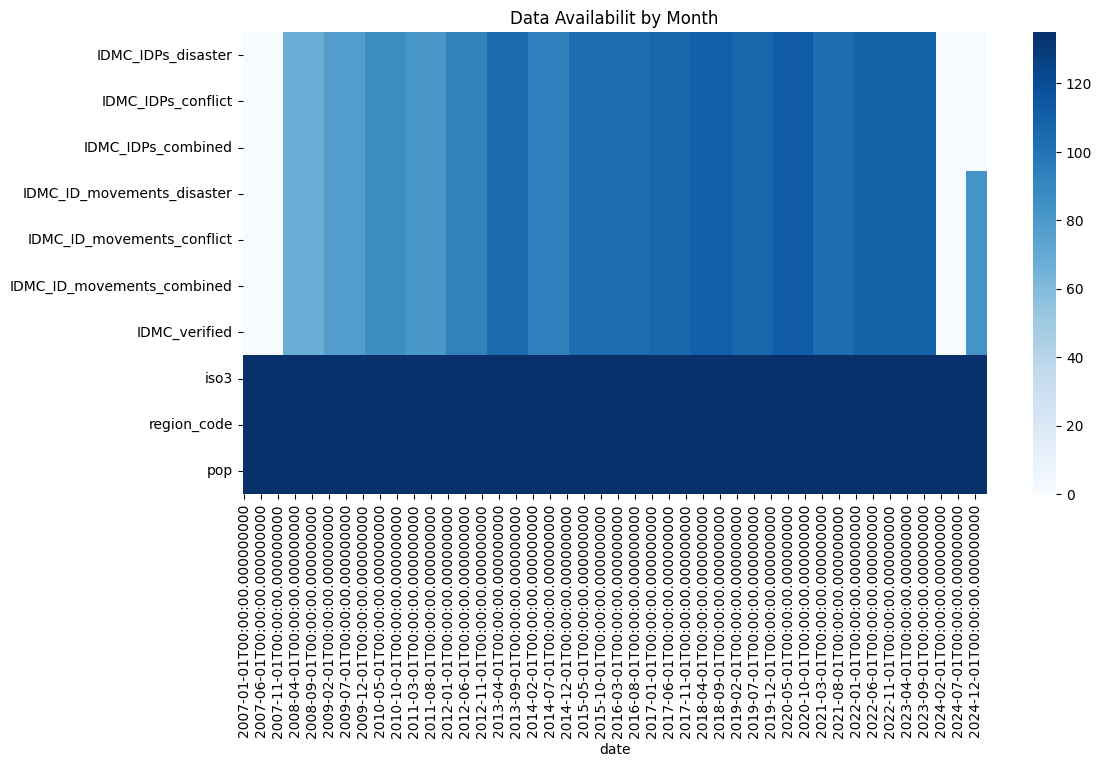

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [25]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

### Correlation between the features

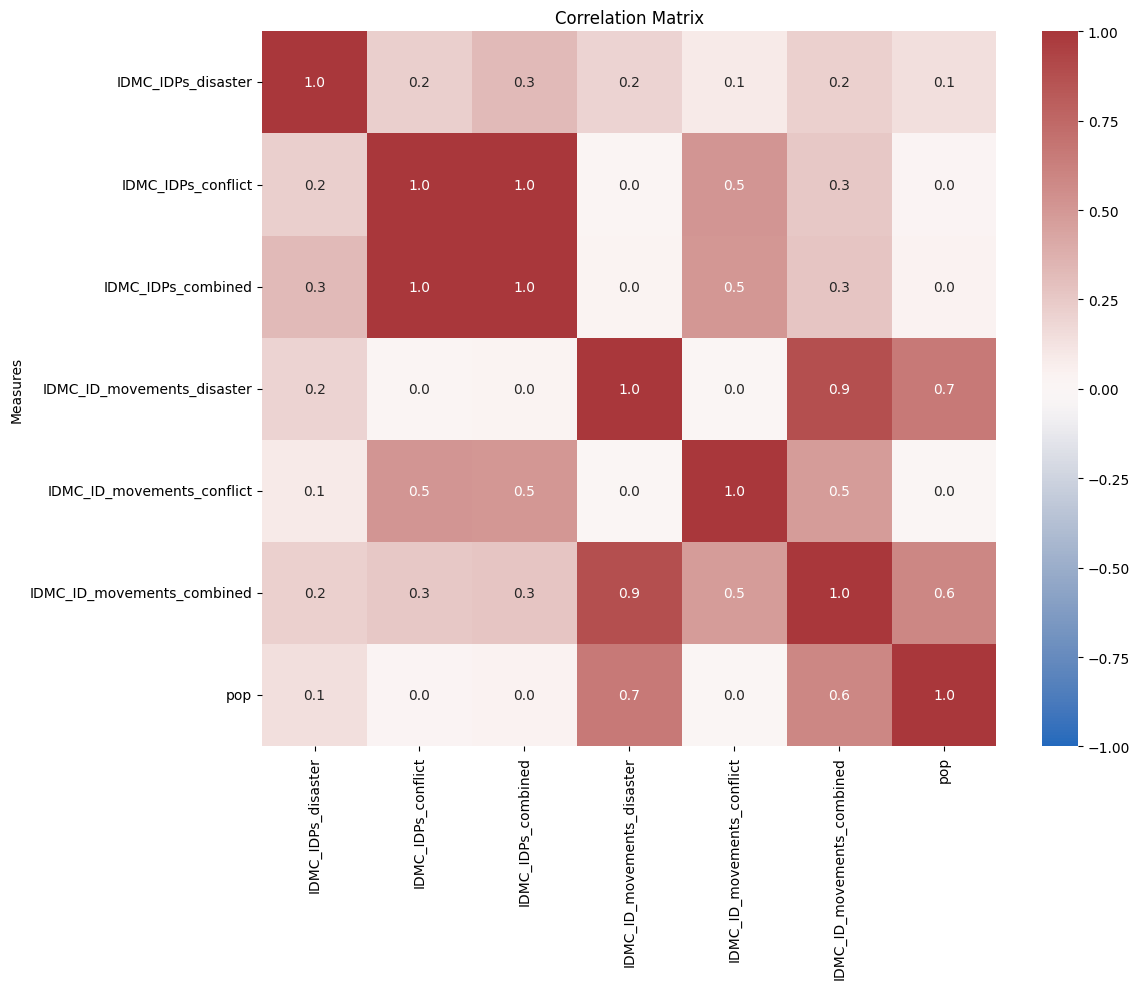

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [27]:
numeric_df.shape

(18804, 7)

### Principal Components Analysis of the features

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 3
Column names for PCA components: ['PC1', 'PC2', 'PC3']


In [29]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [30]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

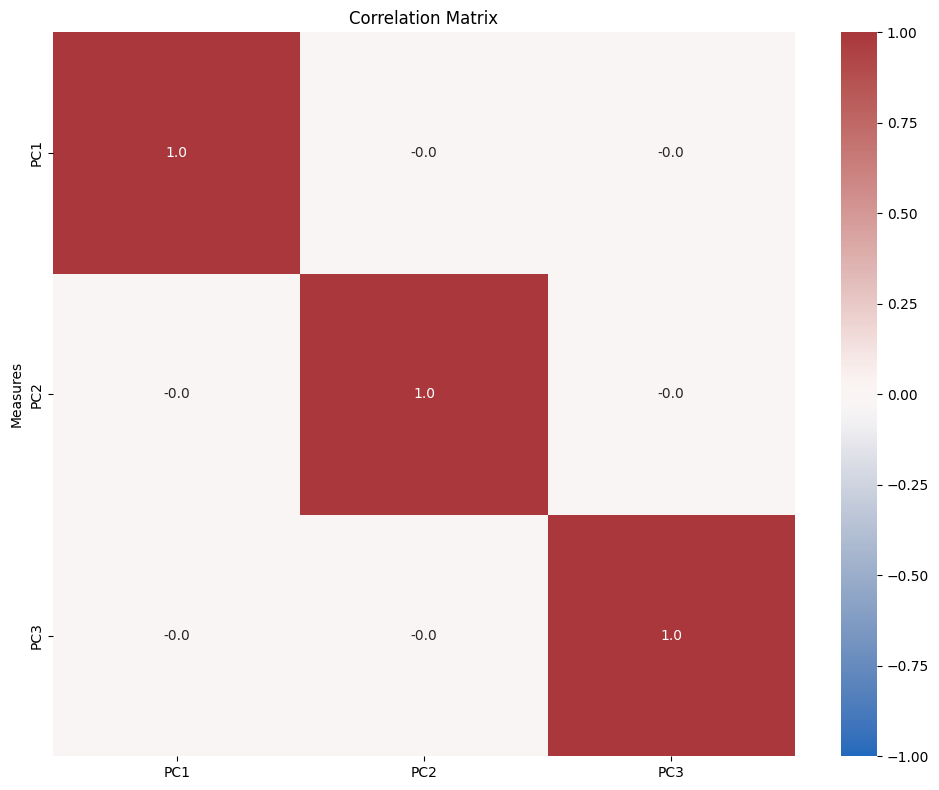

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

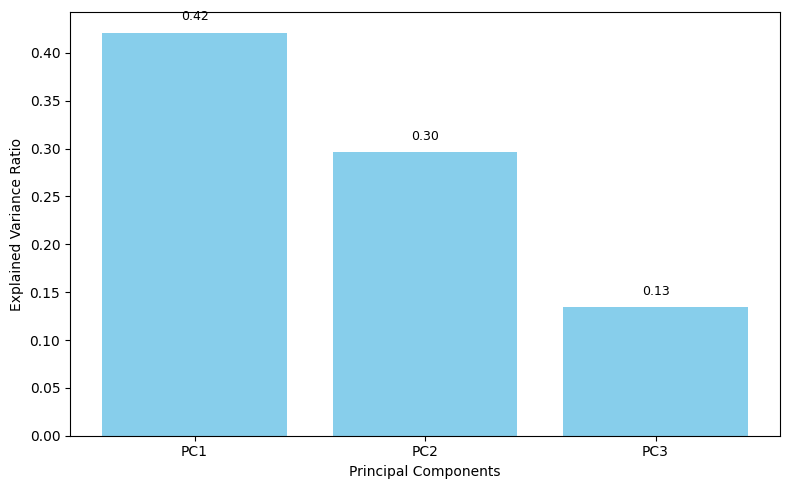

In [32]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Cumulative explained variance at component 2: 0.7174


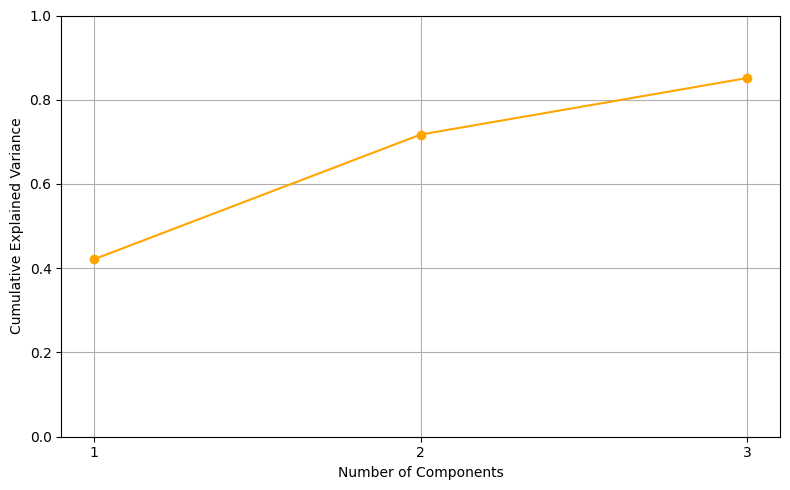

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 2 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

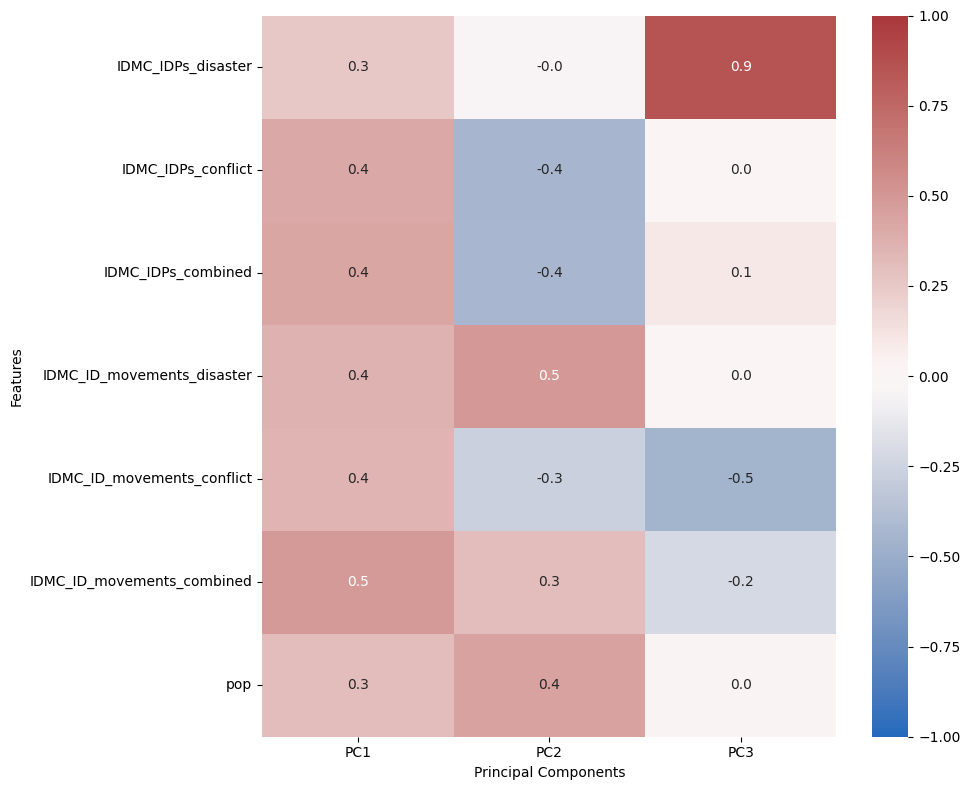

In [35]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [36]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                             PC1   PC2   PC3
IDMC_IDPs_disaster          0.25 -0.03  0.86
IDMC_IDPs_conflict          0.41 -0.44  0.00
IDMC_IDPs_combined          0.43 -0.43  0.10
IDMC_ID_movements_disaster  0.36  0.50  0.00
IDMC_ID_movements_conflict  0.36 -0.27 -0.46
IDMC_ID_movements_combined  0.49  0.31 -0.21
pop                         0.30  0.45  0.03


## Physical Interpretation

### PC1-General Displacement Intensity, This component reflects overall displacement magnitude, combining disaster and conflict — both in stock (IDPs) and flow (movements).

### PC2- Disaster Movement vs Conflict Displacement Split, PC2 distinguishes disaster-related movements/population (+ve) from conflict-related displacement (–ve).